In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from Main_abeille import P, D

document = pd.ExcelFile("capt_donnees_random.xlsx")

ma_feuille = document.sheet_names
print((document.sheet_names))

data = pd.read_excel(document, sheet_name='C.N.')
n, m = data.shape


def annomalie_poid(P):
    for i in range(len(P) - 1):
        if abs(P[i][0] - P[i + 1][0]) > 1:
            # P[i][1] = P[i + 1][0] - P[i][0]
            P[i][1] =1
            P[i][0] = P[i-1][0]


def nb_buttineuses(data, n):
    nb_j = 12 * n // (24 * 60)



    heure = list(map(int, data['Date'][0].split(' ')[0].split('-') + data['Date'][0].split(' ')[1].split(':')))
    t0 = datetime.datetime(heure[0], heure[1], heure[2], 0, 0, 0)
    heure1 = list(map(int, data['Date'][n-1].split(' ')[0].split('-') + data['Date'][n-1].split(' ')[1].split(':')))
    t1 = datetime.datetime(heure1[0], heure1[1], heure1[2], 0, 0, 0)
    nb_j = datetime.timedelta(days=(t1 - t0).days)
    nb_j=nb_j.days
#     print("nb jour=", nb_j)
    Lj = [[] for i in range(nb_j + 1)]
    nj_act = 0

    Lj[0].append([0, t0])
    for i in range(n):

        # heure=data['Date'][i].split(' ')
        heure = list(map(int, data['Date'][i].split(' ')[0].split('-') + data['Date'][i].split(' ')[1].split(':')))
        time = datetime.datetime(heure[0], heure[1], heure[2], heure[3], heure[4], heure[5])
        # tdelta=datetime.timedelta(days=time.day-t0.day)
        if Lj[nj_act] != [] and Lj[nj_act][0][1].day != time.day:
            nj_act += 1
            Lj[nj_act].append([i, time])
#             print(nj_act)

        else:
            Lj[nj_act].append([i, time])

    D = []
    dP = []
    moy = []
    miel_j = []
    miel_tot = []
    # ventil = []
    # tracey=[]
    # tracex = []
    Lj.pop()
    for y in Lj:
        a = False
        for x in y:
            if P[x[0]][1] != 0:
                a = True
        if a:
            dP.append(dP[-1])
            D.append(y[0][1])
            miel_j.append(miel_j[-1])
            miel_tot.append(miel_tot[-1])
            # ventil.append(ventil[-1])
        else:
            min = 1000

            ibis=0
            for x in y:
                i,date=x

                if date.hour >6 and date.hour<9 and min > data['Poids'][y[ibis][0]]:
                    min = data['Poids'][y[ibis][0]]
                if date.hour ==7:
                    h7=data['Poids'][y[ibis][0]]
                ibis+=1

#             print(y[1],min)



            dP.append((h7 - min) / (80 * 10 ** -6) / 500)
            miel_j.append((data['Poids'][y[-1][0]]-data['Poids'][y[0][0]]))
            # ventil.append((max_n[0] - data['Poids'][y[6 * 60 // 12][0]])*10)
            if miel_tot == []:
                miel_tot.append(miel_j[-1])
            else:
                miel_tot.append(miel_tot[-1] + miel_j[-1])
            D.append(y[0][1])

        if len(dP) <= 2:
            moy.append(sum(x for x in dP) / (len(dP)))
        else:
            moy.append(sum((dP[-1], dP[-2], dP[-3])) / 3)
    moy.pop(0)
    moy.append((dP[-1] + dP[-2]) / 2)
    return D, moy, miel_j, miel_tot

if __name__== "__main__":

    annomalie_poid(P)
    d, moy, miel_j, miel_tot = nb_buttineuses(data, n)



['Optibee', 'C.N.', 'D.P.', 'R.G.']


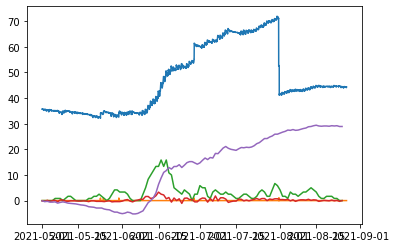

In [10]:
plt.plot(D, P)
plt.plot(d, moy)
plt.plot(d, miel_j)
plt.plot(d, miel_tot)
# plt.plot(d, ventil)
# plt.plot(tracex,tracey)
plt.show()